## Playing Around


### Traingle Fractures usning Linear Algebra

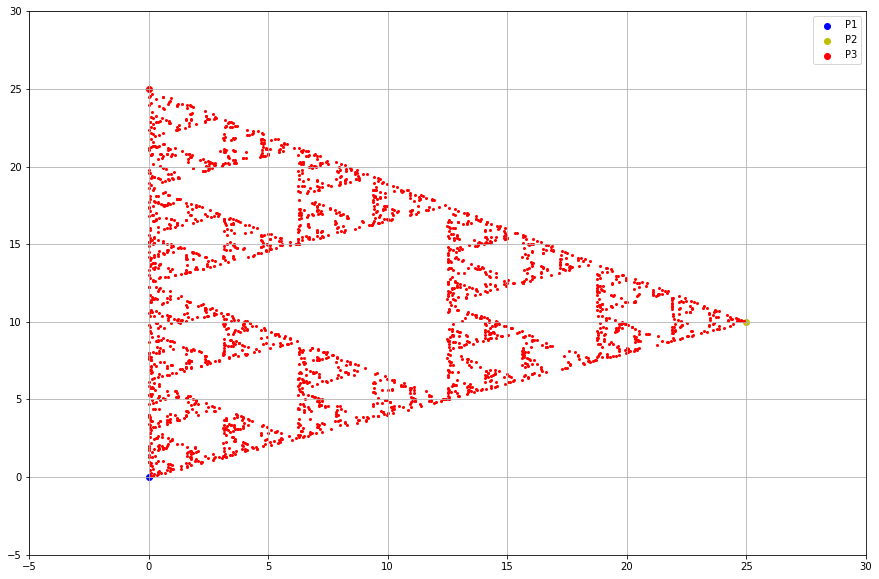

In [18]:
import numpy as np
import matplotlib.pyplot as plt


#######################
## 0. Helper methods ##

def point_in_triangle(point, triangle, log=False):
    """
    - point is a numpy vector
    - triangle is a numpy array of 3 numpy vectors

    ref: https://blackpawn.com/texts/pointinpoly/
    """
    p1_p2 = triangle[1] - triangle[0]
    p1_p3 = triangle[2] - triangle[0]
    p2_p3 = triangle[2] - triangle[1]
    p2_p1 = -1*p1_p2
    P_p1 = point - triangle[0]
    P_p2 = point - triangle[1]
    p3_to_p1p2 = np.sign(np.cross(p1_p2, p1_p3))
    P_to_p1p2 = np.sign(np.cross(p1_p2, P_p1))

    p2_to_p1p3 = np.sign(np.cross(p1_p3, p1_p2))
    P_to_p1p3 = np.sign(np.cross(p1_p3, P_p1))

    p1_to_p2p3 = np.sign(np.cross(p2_p3, p2_p1))
    P_to_p2p3 = np.sign(np.cross(p2_p3, P_p2))
    
    all_in = P_to_p2p3 == p1_to_p2p3 and P_to_p1p3 == p2_to_p1p3 and P_to_p1p2 == p3_to_p1p2
    
    if log:
        print("[Ref] p3 to p1_p2: {}".format(p3_to_p1p2))
        print("----- P to p1_p2: {}".format(P_to_p1p2))
        print("----- P inside p1_p2: {}\n".format(P_to_p1p2 == p3_to_p1p2))
        print("[Ref] p2 to p1_p3: {}".format(p2_to_p1p3))
        print("----- P to p1_p3: {}".format(P_to_p1p3))
        print("----- P inside p1_p3: {}\n".format(P_to_p1p3 == p2_to_p1p3))
        print("[Ref] p1 to p2_p3: {}".format(p1_to_p2p3))
        print("----- P to p2_p3: {}".format(P_to_p1p2))
        print("----- P inside p2_p3: {}\n".format(P_to_p2p3 == p1_to_p2p3))
        print("== Point in triangle: {}==".format(all_in))
    
    return all_in


def generate_random_point_in_triangle(triangle):
    trials = 0
    while (trials <= MAX_TRIALS):
        trials += 1
        rand_point = np.random.randint(0, 30, 2)
        if point_in_triangle(rand_point, main_triangle):
            break
            
    return rand_point

def generate_magic_points(triangle, rand_point):
    number_of_points = 0
    magic_points = [rand_point]
    while number_of_points < MAX_POINTS:
        rand_vertix = main_triangle[np.random.randint(3)]
        new_point_x = np.mean([rand_vertix[0], magic_points[-1][0]])
        new_point_y = np.mean([rand_vertix[1], magic_points[-1][1]])
        new_point = np.array([new_point_x, new_point_y])
        # print("Chosen vertix: {}".format(rand_vertix))
        # print("Chosen point: {}".format(magic_points[-1]))
        # print("New point: {}".format(new_point))
        magic_points.append(new_point)
        number_of_points += 1
    return magic_points


########################################
## 1. Initialize our Main triangle vertices
p1 = np.array([0,0])
p2 = np.array([25,10])
p3 = np.array([0,25])
# p1 = np.random.randint(0,30, 2)
# p2 = np.random.randint(0,30, 2)
# p3 = np.random.randint(0,30, 2)

main_triangle = np.array([p1, p2, p3])

#################################################
## 2. Plotting the main points of the triangle ##
# plt.quiver(*origin, main_triangle[:,0], main_triangle[:,1], color=['r','b','g'], scale=1)
# plt.arrow(0, 0, *p1, color='b', head_width=0.1, head_length=0.1, label="P1")
# plt.arrow(0, 0, *p2, color='y', head_width=0.1, head_length=0.1, label="P2")
# plt.arrow(0, 0, *p3, color='r', head_width=0.1, head_length=0.1, label="P3")
plt.figure(figsize=(15,10))
plt.scatter(p1[0], p1[1], color='b', label="P1")
plt.scatter(p2[0], p2[1], color='y', label="P2")
plt.scatter(p3[0], p3[1], color='r', label="P3")


#################################################################
## 3. Starting with a random number (that fits inside triangle ##
MAX_TRIALS = 100
rand_point = generate_random_point_in_triangle(main_triangle)

########################################################################################
## 4. Defining new points as middway between current_point and a rand triangle vertix ##
MAX_POINTS = 2500
magic_points = generate_magic_points(main_triangle, rand_point)

################
# 5. Plotting ##
for magic_point in magic_points:
    plt.scatter(magic_point[0], magic_point[1], color='r', s=4)
plt.xlim(-5, 30)
plt.ylim(-5, 30)
plt.grid(b=True, which='major')
plt.legend()
plt.show()